In [1]:
import pandas as pd
import cv2

In [2]:
img_path = 'pic2.jpg'
csv_path = 'https://raw.githubusercontent.com/codebrainz/color-names/master/output/colors.csv'

In [3]:
df = pd.read_csv(csv_path)
df

,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54
...,...,...,...,...,...,...
859,yellow_orange,Yellow Orange,#ffae42,255,174,66
860,yellow_process,Yellow (Process),#ffef00,255,239,0
861,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
862,zaffre,Zaffre,#0014a8,0,20,168


In [4]:
# Adding header file
index = ['Color', 'Color_name','hex','R','G','B']
df = pd.read_csv(csv_path, names = index, header= None)

In [5]:
df.head(5)

,Color,Color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [6]:
# Print array of Pixels
img = cv2.imread(img_path)
print(img)

[[[144 124 129]
  [144 124 129]
  [149 126 131]
  ...
  [ 49  65 218]
  [ 52  67 223]
  [ 54  69 225]]

 [[146 126 131]
  [147 125 130]
  [148 125 130]
  ...
  [ 49  65 218]
  [ 51  66 222]
  [ 52  67 223]]

 [[150 128 133]
  [148 126 131]
  [148 125 130]
  ...
  [ 49  65 218]
  [ 49  64 220]
  [ 50  65 221]]

 ...

 [[109 132 127]
  [104 127 122]
  [ 97 119 114]
  ...
  [115 134 139]
  [123 141 148]
  [125 144 151]]

 [[ 80 101  98]
  [ 78  99  96]
  [ 92 113 110]
  ...
  [105 125 130]
  [116 135 142]
  [120 142 148]]

 [[ 56  77  74]
  [ 82 103 100]
  [117 138 135]
  ...
  [ 98 118 123]
  [104 126 132]
  [110 132 138]]]


In [ ]:
img = cv2.resize(img, (800,600)) # Sizing image

clicked = False
r = g = b = xpos = ypos = 0

def get_color_name(R,G,B) :
    minimum = 1000
    for i in range(len(df)) :
        d = abs(R - int(df.loc[i,'R'])) + abs(G - int(df.loc[i,'G'])) + abs(B - int(df.loc[i,'B']))
        if d<=minimum :
            minimum = d
            cname = df.loc[i,'Color_name'] # Determine color name
    return cname



def draw_function(event,x,y,flags,params) :# Determine Co-ordinates
    if event == cv2.EVENT_LBUTTONDBLCLK :
        global clicked, r, b, g, xpos, ypos
        clicked = True
        xpos = x
        ypos = y
        print(x,y)
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)


cv2.namedWindow('image') #window name
cv2.setMouseCallback('image', draw_function)

while True :
    cv2.imshow('image',img)
    if clicked :
        cv2.rectangle(img, (20,20), (60,60), (b,g,r), -1 )
        text = get_color_name(r,g,b) + 'R=' + str(r) + 'G=' + str(g) + 'B=' + str(b)
        cv2.putText(img,text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        if r + b + g >=600 :
            cv2.putText(img,text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
    
    if cv2.waitKey(20) & 0xFF == 27 :
        break

#print(clicked,r,b,g,xpos,ypos)

#cv2.imshow('image',img) # window and image name
#cv2.waitKey(0) # Until and Unless we don't click on cross button
cv2.destroyAllWindows()

538 85
538 85


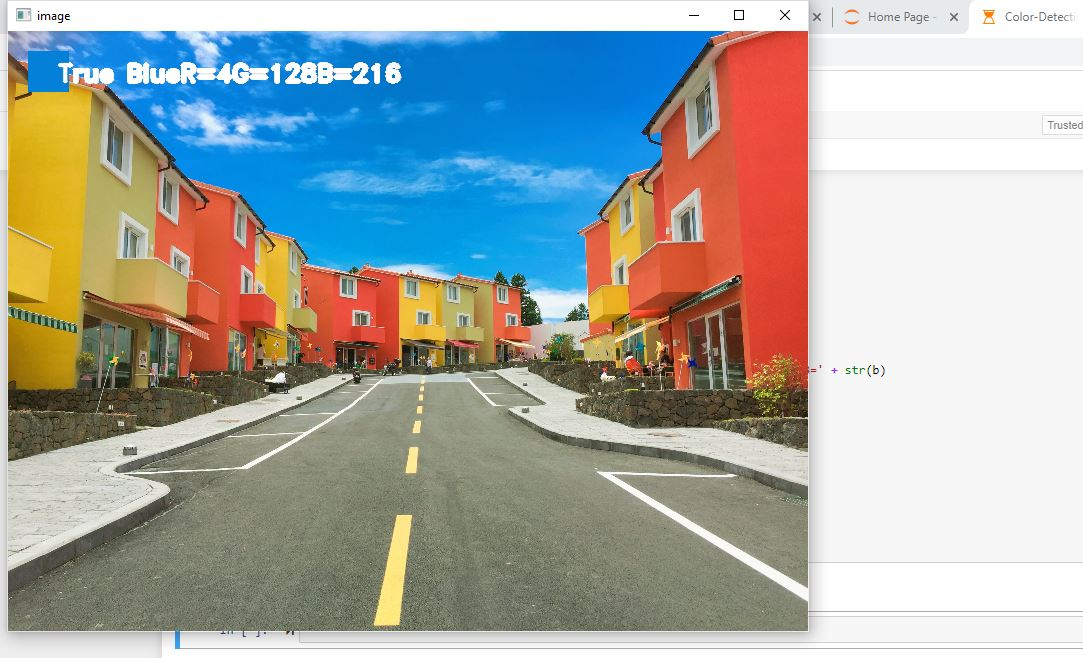